In [ ]:
'''
Might need to use imbalanced-learn from sklearn, beacause the data is too extream.
pip install dmba
pip install pydotplus
https://github.com/royjafari/DataAnalyticsForFun/blob/main/MLP%20Classification/MLP%20Classify%20-%20E.ipynb

0 and 1 change to yes no for testing
'''

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

#class
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree

#Reg
from sklearn.svm import LinearSVC
from sklearn.metrics import r2_score, mean_squared_error, precision_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression





In [2]:
def evaluateBinaryClassification(predictions, actuals):
    contigency = pd.crosstab(actuals,predictions)
    TP = contigency[1][1]
    TN = contigency[0][0]
    FP = contigency[1][0]
    FN = contigency[0][1]
    n = contigency.sum().sum()

    Acuracy = (TP + TN)/n
    Recall = TP/(TP+FN)
    Precision = TP/(TP+FP)
    FScore = 2*Recall*Precision/(Recall+Precision)
    
    return Acuracy, Recall, Precision, FScore

In [3]:
#Create Classifiers
lr = LogisticRegression(solver='lbfgs', max_iter=500)
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)

#Read data
df_mx = pd.read_csv("Sample Data/MX.csv", index_col=0)
df_thai = pd.read_csv("Sample Data/THAI.csv", index_col=0)
df_sgp = pd.read_csv("Sample Data/SGP.csv", index_col=0)

df_agg = pd.concat([df_thai, df_mx])
df_agg.head()

,Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (current US$),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",Real GDP (current US$),...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
"Total debt service (% of exports of goods, services and primary income)",,,,,,,,,,,,,,,,,,,,,
0.478220,0.417122,0.395807,0.000143,0.000000,0.000000,0.000000,0.156366,0.279665,0.212532,0.000014,...,0.4,0.60,1,3,8,0.319919,3.0,0.5,3,0
0.488071,0.418222,0.425714,0.000000,0.003768,0.000047,0.000350,0.147127,0.279731,0.202131,0.000000,...,0.0,0.15,0,1,4,0.319711,3.0,0.5,3,0
0.507164,0.417371,0.452184,0.000707,0.028019,0.000663,0.001292,0.158745,0.279695,0.244266,0.000427,...,0.0,0.15,1,1,4,0.319463,3.0,0.5,2,0
0.529773,0.418589,0.497835,0.001689,0.040052,0.002715,0.002906,0.150165,0.279506,0.227943,0.002647,...,0.0,0.00,0,0,0,0.319813,3.0,0.5,2,0
0.568958,0.417134,0.531526,0.003913,0.105083,0.006484,0.005783,0.151565,0.279147,0.316532,0.006558,...,0.4,0.65,0,3,8,0.320109,3.0,0.5,1,0


In [4]:
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 104 entries, 0.47821976 to 0.015924993
Data columns (total 38 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Short-term debt (% of total external debt)                        104 non-null    float64
 1   Real interest rate (%)                                            104 non-null    float64
 2   Total reserves minus gold (current US$)                           104 non-null    float64
 3   Trade (% of GDP)                                                  104 non-null    float64
 4   Imports of goods and services (current US$)                       104 non-null    float64
 5   Exports of goods and services (current US$)                       104 non-null    float64
 6   Current account balance (% of GDP)                                104 non-null    float64
 7   Portfolio invest

In [5]:
df_agg.shape

(104, 38)

In [6]:
#Set X and y for testing
X = df_agg.drop(columns=['Target'])
y = df_agg['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [7]:
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(72, 37) (32, 37) (72,) (32,)


                                              feature  importance       std
25                                           Soft peg    0.000000  0.000000
26                                                Peg    0.002424  0.018118
32             Legislative/Executive election (exrec)    0.005125  0.029529
31                                  Turnover (xconst)    0.005206  0.024064
35                    Economic Effectiveness (ecoeff)    0.005569  0.032374
29                                    Polity (polity)    0.006651  0.030113
28                            Left Government (democ)    0.007034  0.031597
24                                          Contagion    0.007725  0.031847
36                              Presist (presistance)    0.010406  0.049594
19        Gross fixed capital formation (current US$)    0.011575  0.046032
4         Imports of goods and services (current US$)    0.011599  0.041372
3                                    Trade (% of GDP)    0.012463  0.043707
30          

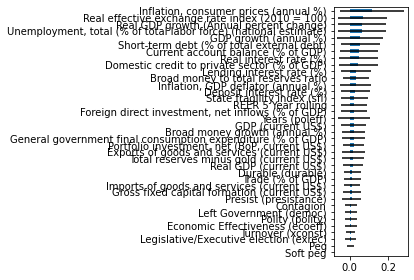

In [8]:
#Feature Selection
rf = RandomForestClassifier(n_estimators=1000,random_state=2)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': X_train.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [9]:
select_features=df[df.importance>=0.001].feature

In [10]:
#Tuned KNN
knn = KNeighborsClassifier(n_neighbors=1,weights='uniform').fit(X_train[select_features], y_train)
y_predict_knn = knn.predict(X_test[select_features])
pd.crosstab(y_test,y_predict_knn)

col_0,0,1
Target,,
0,26,0
1,3,3


In [11]:
evaluateBinaryClassification(y_predict_knn,y_test)

(0.90625, 0.5, 1.0, 0.6666666666666666)

In [12]:
#Naive Bayesian

In [13]:
#Set X and y for testing
X = df_agg.drop(columns=['Target'])
y = df_agg['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(72, 37) (32, 37) (72,) (32,)


In [14]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train[select_features], y_train)

y_predict_nb = nb.predict(X_test[select_features])
pd.crosstab(y_test,y_predict_nb)

col_0,0,1
Target,,
0,23,3
1,6,0


In [15]:
evaluateBinaryClassification(y_predict_nb,y_test)

C:\Users\User\AppData\Local\Temp/ipykernel_37084/2088029018.py:12: RuntimeWarning: invalid value encountered in double_scalars
  FScore = 2*Recall*Precision/(Recall+Precision)


(0.71875, 0.0, 0.0, nan)

In [16]:
# predict probabilities
y_prob = nb.predict_proba(X_test[select_features])

summary_df = pd.concat([pd.DataFrame({'actual': y_test, 'predicted': y_predict_nb}),
                pd.DataFrame(y_prob, index=y_test.index,columns = ['No_prob','Yes_prob'])], axis=1)
y_predict_nb = pd.Series(summary_df.Yes_prob>0.9999998888888889).replace({False:0,True:1})

In [19]:
Methods = ['Random','KNN','NB','DT']
Metrics = ['Accuracy','Recall','Precision','Fscore']

compare_df = pd.DataFrame(index = Methods, columns = Metrics)

#Method1 #KNN

compare_df.loc['KNN'] = evaluateBinaryClassification(y_predict_knn,y_test)

number_Yes =  np.sum(y_predict_knn==1)

'''
#Method 2 Random
y_predict_random = pd.Series(np.random.permutation(len(y_test))<number_Yes).replace({False:0,True:1})
print(evaluateBinaryClassification(y_predict_random,y_test))

compare_df.loc['Random'] = evaluateBinaryClassification(y_predict_random,y_test)


#Method 3 NB
compare_df.loc['NB'] = evaluateBinaryClassification(y_predict_nb,y_test)
'''
compare_df

,Accuracy,Recall,Precision,Fscore
Random,NaN,NaN,NaN,NaN
KNN,0.90625,0.5,1.0,0.666667
NB,NaN,NaN,NaN,NaN
DT,NaN,NaN,NaN,NaN


In [22]:
#print('Random Method number of yes prediction: {}'.format(np.sum(y_predict_random==1)))
print('KNN Method number of yes prediction: {}'.format(np.sum(y_predict_knn==1)))
print('NB Method number of yes prediction: {}'.format(np.sum(y_predict_nb==1)))

KNN Method number of yes prediction: 3
NB Method number of yes prediction: 0


In [ ]:
#DT

In [ ]:
#DT Preprocess

In [23]:
#Set X and y for testing
X = df_agg.drop(columns=['Target'])
y = df_agg['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape,X_test.shape,y_train.shape, y_test.shape)

(72, 37) (32, 37) (72,) (32,)


In [26]:
#Tuned DT
classTree = DecisionTreeClassifier(criterion= 'entropy', max_depth= 10,
                                   min_impurity_decrease= 0.005, min_samples_split= 16, splitter= 'best')
classTree.fit(X_train, y_train)

plotDecisionTree(classTree, feature_names=X_train.columns, class_names=classTree.classes_)

'You need to install pydotplus to visualize decision trees'

In [27]:
#compare
y_predict_dt = classTree.predict(X_test)
compare_df.loc['DT'] = evaluateBinaryClassification(y_predict_dt,y_test)
compare_df

,Accuracy,Recall,Precision,Fscore
Random,NaN,NaN,NaN,NaN
KNN,0.90625,0.5,1.0,0.666667
NB,NaN,NaN,NaN,NaN
DT,0.8125,0.5,0.5,0.5


In [28]:
#print('Random Method number of yes prediction: {}'.format(np.sum(y_predict_random==1)))
print('KNN Method number of yes prediction: {}'.format(np.sum(y_predict_knn==1)))
print('NB Method number of yes prediction: {}'.format(np.sum(y_predict_nb==1)))
print('DT Method number of yes prediction: {}'.format(np.sum(y_predict_dt==1)))

KNN Method number of yes prediction: 3
NB Method number of yes prediction: 0
DT Method number of yes prediction: 6


In [ ]:
#MLP Classificaiton

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=5)
mlp.fit(X_train, y_train)
y_predict_mlp = mlp.predict(X_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
compare_df.loc['MLP'] = evaluateBinaryClassification(y_predict_mlp,y_test)
compare_df

,Accuracy,Recall,Precision,Fscore
Random,NaN,NaN,NaN,NaN
KNN,0.90625,0.5,1.0,0.666667
NB,NaN,NaN,NaN,NaN
DT,0.8125,0.5,0.5,0.5
MLP,0.875,0.333333,1.0,0.5


In [31]:
#print('Random Method number of yes prediction: {}'.format(np.sum(y_predict_random==1)))
print('KNN Method number of yes prediction: {}'.format(np.sum(y_predict_knn==1)))
print('NB Method number of yes prediction: {}'.format(np.sum(y_predict_nb==1)))
print('DT Method number of yes prediction: {}'.format(np.sum(y_predict_dt==1)))
print('MLP Method number of yes prediction: {}'.format(np.sum(y_predict_mlp==1)))

KNN Method number of yes prediction: 3
NB Method number of yes prediction: 0
DT Method number of yes prediction: 6
MLP Method number of yes prediction: 2


In [ ]:
#Tune MLP

In [32]:
import warnings

warnings.filterwarnings("ignore")

In [35]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=1)

param_grid = {
    'hidden_layer_sizes':[5],
    'activation': ['identity','logistic','tanh','relu'],
    'solver': ['lbfgs','sgd','adam'],
    'learning_rate':['constant','invscaling','adaptive']}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring=['recall','f1'],refit='f1',verbose=2)
gridSearch.fit(X_train, y_train.replace({'yes':1,'no':0}))
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 36 candidates, totalling 36 fits
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=sgd; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=constant, solver=adam; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=sgd; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, solver=lbfgs; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=adaptive, solver=sgd; total time=   0.0s
[CV] END activation=identity, hidden_layer_sizes=5, learning_rate=ada

In [36]:
param_grid = {
    'hidden_layer_sizes':[5,10,15,(5,5),(5,10)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate':['invscaling']
}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring='recall',verbose=2)
gridSearch.fit(X_train, y_train.replace({'yes':1,'no':0}))
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 5 candidates, totalling 5 fits
[CV] END activation=relu, hidden_layer_sizes=5, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=10, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=15, learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(5, 5), learning_rate=invscaling, solver=adam; total time=   0.0s
[CV] END activation=relu, hidden_layer_sizes=(5, 10), learning_rate=invscaling, solver=adam; total time=   0.0s
Score:  0.0
Parameters:  {'activation': 'relu', 'hidden_layer_sizes': 5, 'learning_rate': 'invscaling', 'solver': 'adam'}


In [37]:
param_grid = {
    'hidden_layer_sizes':[5,10,15,(5,5),(5,10)],
    'activation': ['identity'],
    'solver': ['adam'],
    'alpha': [0,0.0005,0.0001,0.0005,0.001],
    'learning_rate':['invscaling'],
    'learning_rate_init': [0,0.0001,0.0005,0.001, 0.005,0.01],
    'max_iter': [200,500],
    'shuffle': [True,False] 
}

gridSearch = GridSearchCV(MLPClassifier(), param_grid, cv=cv,
                          scoring='recall',verbose=2)
gridSearch.fit(X_train, y_train.replace({'yes':1,'no':0}))
print('Score: ', gridSearch.best_score_)
print('Parameters: ', gridSearch.best_params_)

Fitting 1 folds for each of 600 candidates, totalling 600 fits
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling, learning_rate_init=0, max_iter=200, shuffle=True, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling, learning_rate_init=0, max_iter=200, shuffle=False, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling, learning_rate_init=0, max_iter=500, shuffle=True, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling, learning_rate_init=0, max_iter=500, shuffle=False, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling, learning_rate_init=0.0001, max_iter=200, shuffle=True, solver=adam; total time=   0.0s
[CV] END activation=identity, alpha=0, hidden_layer_sizes=5, learning_rate=invscaling

In [39]:
X_train_s, X_tune, y_train_s, y_tune = train_test_split(X_train, y_train,
                                                        test_size=0.2)
for i in range(15):
    mlp = MLPClassifier(hidden_layer_sizes=5,activation='relu',
                        learning_rate='invscaling', solver='adam',
                        random_state=i)
    
    mlp.fit(X_train_s, y_train_s)
    y_predict_mlp = mlp.predict(X_tune)
    print(i,evaluateBinaryClassification(y_predict_mlp,y_tune))            

In [41]:
mlp = MLPClassifier(hidden_layer_sizes=5,activation='relu',
                        learning_rate='invscaling', solver='adam',
                        random_state=13)

mlp.fit(X_train_s, y_train_s)
y_predict_mlp = mlp.predict(X_test)
compare_df.loc['MLP'] = evaluateBinaryClassification(y_predict_mlp,y_test)
compare_df

KeyError: 1

In [ ]:
#print('Random Method number of yes prediction: {}'.format(np.sum(y_predict_random==1)))
print('KNN Method number of yes prediction: {}'.format(np.sum(y_predict_knn==1)))
print('NB Method number of yes prediction: {}'.format(np.sum(y_predict_nb==1)))
print('DT Method number of yes prediction: {}'.format(np.sum(y_predict_dt==1)))
print('MLP Method number of yes prediction: {}'.format(np.sum(y_predict_mlp==1)))

In [ ]:
from sklearn.model_selection import GridSearchCV


parameter_space = {
    "random_state": [4211],
    "max_iter": [500],
    "early_stopping": [True],
    "hidden_layer_sizes": [(32, 32, 32), (64, 64, 64)],
    "learning_rate_init": [0.1, 0.01, 0.001],
    "learning_rate": ["adaptive"],
    "solver": ['sgd', 'adam'],
}

x_train, y_train = X_train[lasso_selected].values, df_train['label'] 

# 5-fold cross validation with metric accuracy
grid_search = GridSearchCV(MLPClassifier(), parameter_space, cv=5, scoring="accuracy")
grid_search.fit(x_train, y_train)


params = grid_search.cv_results_['params']
mean_accuracies = grid_search.cv_results_['mean_test_score']
std_accuaracies = grid_search.cv_results_['std_test_score']


top_k = 3
sorted_idx = np.argsort(mean_accuracies)[::-1][:top_k]

for i in sorted_idx:
    print(params[i])
    print(f"validation acc: {mean_accuracies[i]} +/- {std_accuaracies[i]}")


print(grid_search.best_params_)

x_train, y_train = X_train[lasso_selected].values, df_train['label']
x_test, y_test = X_test[lasso_selected].values, df_test['label']

model = MLPClassifier(**grid_search.best_params_)
model.fit(x_train, y_train)

# predictions on the test set
y_pred = model.predict(x_test)
acc = accuracy_score(y_test, y_pred)